In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']=10,6
from keras.layers.core import Dense, Activation, Dropout
import tensorflow as tf
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset = pd.read_csv(("../input/rainfall/Sub_Division_IMD_2017.csv"), encoding = "ISO-8859-1")
dataset

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,Lakshadweep,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4184,Lakshadweep,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4185,Lakshadweep,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4
4186,Lakshadweep,2016,59.6,12.1,3.2,2.6,77.4,321.1,262.6,86.2,75.6,58.6,32.0,74.7,1065.7,71.7,83.2,745.4,165.4


In [3]:
# Grouping By Subdivisions
groups = dataset.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','NOV','DEC']

# Creating a North Interior Karnataka focused Datafram
data=groups.get_group(('North Interior Karnataka'))
data=data.melt(['YEAR']).reset_index()
df= data[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.columns=['INDEX','YEAR','Month','avg_rainfall']

# Encoding Months
d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(d)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [4]:
# Adding a date column
df['Date']=pd.to_datetime(df.assign(Day=1).loc[:,['YEAR','Month','Day']])
df

,INDEX,YEAR,Month,avg_rainfall,Date
0,0,1901,1,3.5,1901-01-01
117,117,1901,2,18.8,1901-02-01
234,234,1901,3,7.1,1901-03-01
351,351,1901,4,67.2,1901-04-01
468,468,1901,5,65.5,1901-05-01
...,...,...,...,...,...
818,818,2017,7,76.8,2017-07-01
935,935,2017,8,105.8,2017-08-01
1052,1052,2017,9,206.6,2017-09-01
1169,1169,2017,11,4.9,2017-11-01


In [5]:
cols=['avg_rainfall']
dataset=df[cols]
series=dataset
series

,avg_rainfall
0,3.5
117,18.8
234,7.1
351,67.2
468,65.5
...,...
818,76.8
935,105.8
1052,206.6
1169,4.9


In [6]:
data_raw = series.values.astype("float32")

# We apply the MinMax scaler from sklearn to normalize data in the (0, 1) interval.
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw)

# Print a few values.
dataset[0:5]

array([[0.01114295],
       [0.05985355],
       [0.02260427],
       [0.2139446 ],
       [0.20853232]], dtype=float32)

In [7]:
# Using 60% of data for training, 40% for validation.
TRAIN_SIZE = 0.80

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (1029, 258)


In [8]:
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [9]:
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# The LSTM network expects the input data (X) to be provided with a specific array structure in the form of [samples, time steps, features].
# Currently, the data is in the form of [samples, features], and you are framing the problem as one time step for each sample.
# Reshape the input data into appropriate form for Keras.
train_X_reshape = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X_reshape = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X_reshape.shape)

Original training data shape:
(1027, 1)
New training data shape:
(1027, 1, 1)


In [10]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(train_X, train_Y)

LinearRegression()

In [11]:
forecast = LR.predict(train_X)
forecast = pd.DataFrame(forecast,columns=["Prediction"])
pred = scaler.inverse_transform(forecast)
orig = scaler.inverse_transform([train_Y])
error=mean_squared_error(orig[0], pred[:, 0], sample_weight=None, multioutput='uniform_average', squared=False)
print(error)

55.70584201418694


In [12]:
forecast = LR.predict(test_X)
forecast = pd.DataFrame(forecast,columns=["Prediction"])
pred = scaler.inverse_transform(forecast)
orig = scaler.inverse_transform([test_Y])
error=mean_squared_error(orig[0], pred[:, 0], sample_weight=None, multioutput='uniform_average', squared=False)
print(error)

53.08746435547185


In [13]:
from sklearn.linear_model import SGDRegressor

sgdreg = SGDRegressor()
sgdreg.fit(train_X,train_Y)

y_pred_sgd = sgdreg.predict(train_X)

In [14]:
forecast = sgdreg.predict(train_X)
forecast = pd.DataFrame(forecast,columns=["Prediction"])
pred = scaler.inverse_transform(forecast)
orig = scaler.inverse_transform([train_Y])
error=mean_squared_error(orig[0], pred[:, 0], sample_weight=None, multioutput='uniform_average', squared=False)
print(error)

59.075352273523215


In [15]:
forecast = sgdreg.predict(test_X)
forecast = pd.DataFrame(forecast,columns=["Prediction"])
pred = scaler.inverse_transform(forecast)
orig = scaler.inverse_transform([test_Y])
error=mean_squared_error(orig[0], pred[:, 0], sample_weight=None, multioutput='uniform_average', squared=False)
print(error)

57.769466216822764


In [16]:
def fit_model_lstm(train_X, train_Y, window_size = 1):
  model = Sequential()
  model.add(tf.keras.layers.LSTM(50, activation='tanh', recurrent_activation="sigmoid", return_sequences=True, input_shape=(1, window_size)))
  model.add(tf.keras.layers.LSTM(50, activation='tanh'))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  model.fit(train_X, train_Y, epochs = 350, batch_size = 64)
  return (model)

In [17]:
model_lstm = fit_model_lstm(train_X_reshape, train_Y)
model_lstm.summary()

2022-11-17 03:26:20.299192: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-11-17 03:26:21.335075: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/350
17/17 [==============================] - 4s 4ms/step - loss: 0.0626
Epoch 2/350
17/17 [==============================] - 0s 4ms/step - loss: 0.0416
Epoch 3/350
17/17 [==============================] - 0s 4ms/step - loss: 0.0358
Epoch 4/350
17/17 [==============================] - 0s 4ms/step - loss: 0.0347
Epoch 5/350
17/17 [==============================] - 0s 4ms/step - loss: 0.0336
Epoch 6/350
17/17 [==============================] - 0s 6ms/step - loss: 0.0326
Epoch 7/350
17/17 [==============================] - 0s 5ms/step - loss: 0.0322
Epoch 8/350
17/17 [==============================] - 0s 4ms/step - loss: 0.0322
Epoch 9/350
17/17 [==============================] - 0s 4ms/step - loss: 0.0320
Epoch 10/350
17/17 [==============================] - 0s 4ms/step - loss: 0.0318
Epoch 11/350
17/17 [==============================] - 0s 4ms/step - loss: 0.0318
Epoch 12/350
17/17 [==============================] - 0s 4ms/step - loss: 0.0317
Epoch 13/350
17/17 [=================

In [18]:
import math
def predict_and_score(model, X, Y):

    pred = scaler.inverse_transform(model.predict(X))
    # Prepare Y data to also be on the original scale for interpretability.
    orig = scaler.inverse_transform([Y])
    # Calculate RMSE.
    score = math.sqrt(mean_squared_error(orig[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_predict = predict_and_score(model_lstm, train_X_reshape, train_Y)
rmse_test, test_predict = predict_and_score(model_lstm, test_X_reshape, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

Training data score: 49.54 RMSE
Test data score: 49.21 RMSE


In [19]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.7 MB/s eta 0:00:00


In [20]:
from pmdarima.arima import auto_arima
model_sarimax = auto_arima(train, seasonal=True, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
model_sarimax.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1297.223, Time=2.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-342.347, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-633.065, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-557.807, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=248.071, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-675.259, Time=0.56 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-633.879, Time=0.56 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1077.859, Time=1.25 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.93 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-631.088, Time=0.27 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-690.889, Time=0.70 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-968.366, Time=1.76 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.87 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-558.043, Time=0.39 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] inter

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1029
Model:               SARIMAX(2, 0, 2)   Log Likelihood                 654.611
Date:                Thu, 17 Nov 2022   AIC                          -1297.223
Time:                        03:27:35   BIC                          -1267.605
Sample:                             0   HQIC                         -1285.981
                               - 1029                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0559      0.002     31.255      0.000       0.052       0.059
ar.L1          1.6802      0.002    903.343      0.000       1.677       1.684
ar.L2         -0.9963      0.002   -462.069      0.000      -1.001      -0.992
ma.L1         -1.6655      0.011   -152.369      0.000      -1.687      -1.644
ma.L2          0.9568      0.011     88.772      0.000       0.936       0.978
sigma2         0.0163      0.001     29.923      0.000       0.015       0.017
===================================================================================
Ljung-Box (L1) (Q):                   3.13   Jarque-Bera (JB):               674.47
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             1.14
Prob(H) (two-sided):                  0.72   Kurtosis:                         6.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
forecast = model_sarimax.predict(n_periods=1027)
forecast = pd.DataFrame(forecast,columns=["Prediction"])
pred = scaler.inverse_transform(forecast)
orig = scaler.inverse_transform([train_Y])
error=mean_squared_error(orig[0], pred[:, 0], sample_weight=None, multioutput='uniform_average', squared=False)
print(error)

80.4307258404699


In [22]:
forecast = model_sarimax.predict(n_periods=256)
forecast = pd.DataFrame(forecast,columns=["Prediction"])
pred = scaler.inverse_transform(forecast)
orig = scaler.inverse_transform([test_Y])
error=mean_squared_error(orig[0], pred[:, 0], sample_weight=None, multioutput='uniform_average', squared=False)
print(error)

50.43624125549187


In [23]:
temp=pd.read_csv("../input/weather-data-in-india-from-1901-to-2017/Weather Data in India from 1901 to 2017.csv", index_col=[0])
temp

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,18.88,21.07,24.53,26.97,29.06,28.24,27.50,27.22,26.87,25.63,22.18,19.69
113,2014,18.81,20.35,23.34,26.91,28.45,29.42,28.07,27.42,26.61,25.38,22.53,19.50
114,2015,19.02,21.23,23.52,26.52,28.82,28.15,28.03,27.64,27.04,25.82,22.95,20.21
115,2016,20.92,23.58,26.61,29.56,30.41,29.70,28.18,28.17,27.72,26.81,23.90,21.89


In [24]:
groups_t=temp.melt(['YEAR']).reset_index()
groups_t

,index,YEAR,variable,value
0,0,1901,JAN,17.99
1,1,1902,JAN,19.00
2,2,1903,JAN,18.32
3,3,1904,JAN,17.77
4,4,1905,JAN,17.40
...,...,...,...,...
1399,1399,2013,DEC,19.69
1400,1400,2014,DEC,19.50
1401,1401,2015,DEC,20.21
1402,1402,2016,DEC,21.89


In [25]:
temp=groups_t.reset_index()
df_temp= temp[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df_temp.columns=['INDEX','YEAR','Month','avg_temp']

# Encoding Months
d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df_temp['Month']=df_temp['Month'].map(d)
df_temp

,INDEX,YEAR,Month,avg_temp
0,0,1901,1,17.99
117,117,1901,2,19.43
234,234,1901,3,23.49
351,351,1901,4,26.41
468,468,1901,5,28.28
...,...,...,...,...
935,935,2017,8,28.12
1052,1052,2017,9,28.11
1169,1169,2017,10,27.24
1286,1286,2017,11,23.92


In [26]:
# Adding a date column
df_temp['Date']=pd.to_datetime(df_temp.assign(Day=1).loc[:,['YEAR','Month','Day']])
df_temp

,INDEX,YEAR,Month,avg_temp,Date
0,0,1901,1,17.99,1901-01-01
117,117,1901,2,19.43,1901-02-01
234,234,1901,3,23.49,1901-03-01
351,351,1901,4,26.41,1901-04-01
468,468,1901,5,28.28,1901-05-01
...,...,...,...,...,...
935,935,2017,8,28.12,2017-08-01
1052,1052,2017,9,28.11,2017-09-01
1169,1169,2017,10,27.24,2017-10-01
1286,1286,2017,11,23.92,2017-11-01


In [27]:
X=np.asanyarray(df_temp[['YEAR','Month']]).astype('int')
y=np.asanyarray(df_temp['avg_temp']).astype('int')

In [28]:
cols=['avg_temp']
dataset=df_temp[cols]
series=dataset
series

,avg_temp
0,17.99
117,19.43
234,23.49
351,26.41
468,28.28
...,...
935,28.12
1052,28.11
1169,27.24
1286,23.92


In [29]:
data_raw = series.values.astype("float32")

# We apply the MinMax scaler from sklearn
# to normalize data in the (0, 1) interval.
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw)

# Print a few values.
dataset[0:5]

array([[0.05469322],
       [0.1611234 ],
       [0.46119726],
       [0.677014  ],
       [0.81522536]], dtype=float32)

In [30]:
# Using 60% of data for training, 40% for validation.
TRAIN_SIZE = 0.80

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train_t, test_t = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train_t), len(test_t))))

Number of entries (training set, test set): (1123, 281)


In [31]:
from pmdarima.arima import auto_arima
model_sarimax = auto_arima(train, xreg=train_t, seasonal=True, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
model_sarimax.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1297.223, Time=1.99 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-342.347, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-633.065, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-557.807, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=248.071, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-675.259, Time=0.55 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-633.879, Time=0.55 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1077.859, Time=2.07 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.22 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-631.088, Time=0.39 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-690.889, Time=0.81 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-968.366, Time=1.66 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.86 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-558.043, Time=0.27 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] inter

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1029
Model:               SARIMAX(2, 0, 2)   Log Likelihood                 654.611
Date:                Thu, 17 Nov 2022   AIC                          -1297.223
Time:                        03:27:52   BIC                          -1267.605
Sample:                             0   HQIC                         -1285.981
                               - 1029                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0559      0.002     31.255      0.000       0.052       0.059
ar.L1          1.6802      0.002    903.343      0.000       1.677       1.684
ar.L2         -0.9963      0.002   -462.069      0.000      -1.001      -0.992
ma.L1         -1.6655      0.011   -152.369      0.000      -1.687      -1.644
ma.L2          0.9568      0.011     88.772      0.000       0.936       0.978
sigma2         0.0163      0.001     29.923      0.000       0.015       0.017
===================================================================================
Ljung-Box (L1) (Q):                   3.13   Jarque-Bera (JB):               674.47
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             1.14
Prob(H) (two-sided):                  0.72   Kurtosis:                         6.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
forecast = model_sarimax.predict(n_periods=1027)
forecast = pd.DataFrame(forecast,columns=["Prediction"])
pred = scaler.inverse_transform(forecast)
orig = scaler.inverse_transform([train_Y])
error=mean_squared_error(orig[0], pred[:, 0], sample_weight=None, multioutput='uniform_average', squared=False)
print(error)

3.464590151862242


In [33]:
forecast = model_sarimax.predict(n_periods=256)
forecast = pd.DataFrame(forecast,columns=["Prediction"])
pred = scaler.inverse_transform(forecast)
orig = scaler.inverse_transform([test_Y])
error=mean_squared_error(orig[0], pred[:, 0], sample_weight=None, multioutput='uniform_average', squared=False)
print(error)

2.1725640658436256


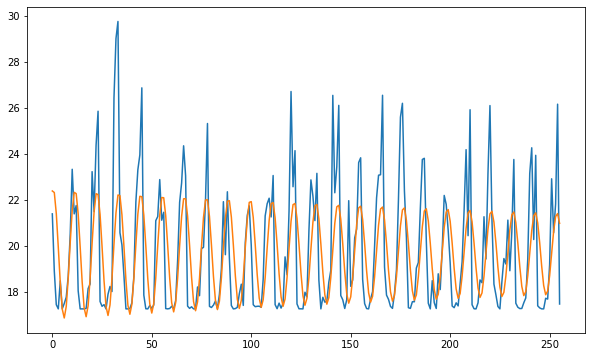

In [34]:
import matplotlib.pyplot as plt
plt.plot(orig[0])
plt.plot(pred[:, 0])
plt.show()